In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:

data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


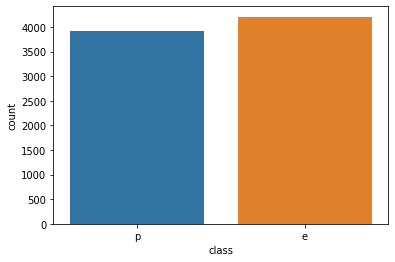

In [5]:
x = data['class']

ax = sns.countplot(x=x, data=data)

In [8]:
def data_plot(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11, 8)})
        ax = sns.countplot(x=data[col],hue=hue,data=data)

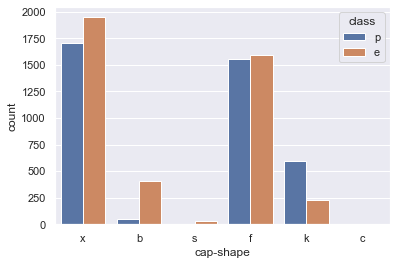

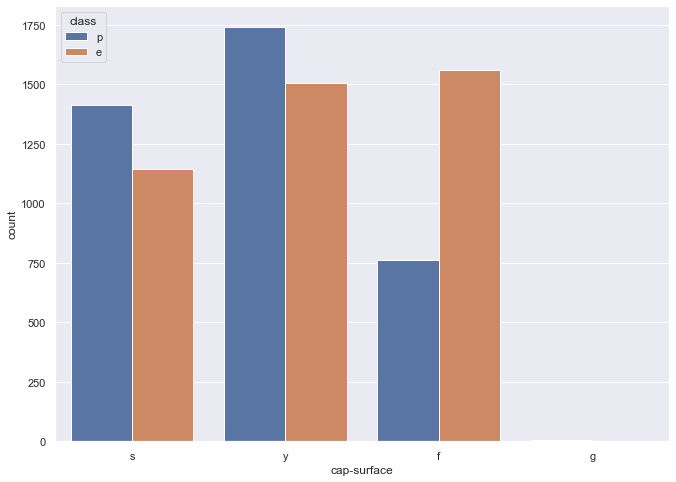

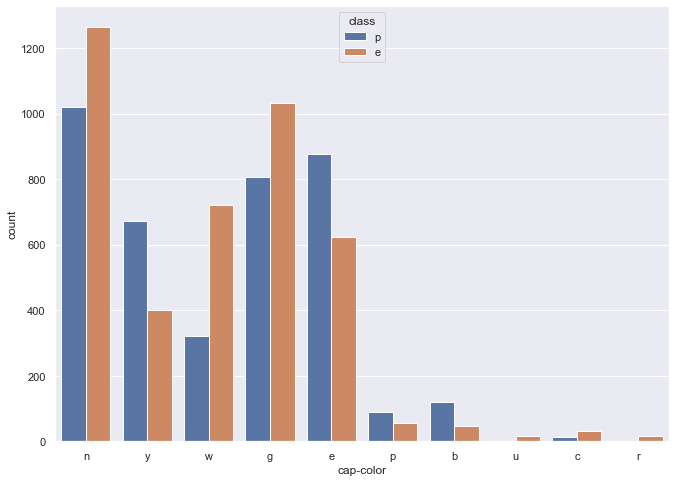

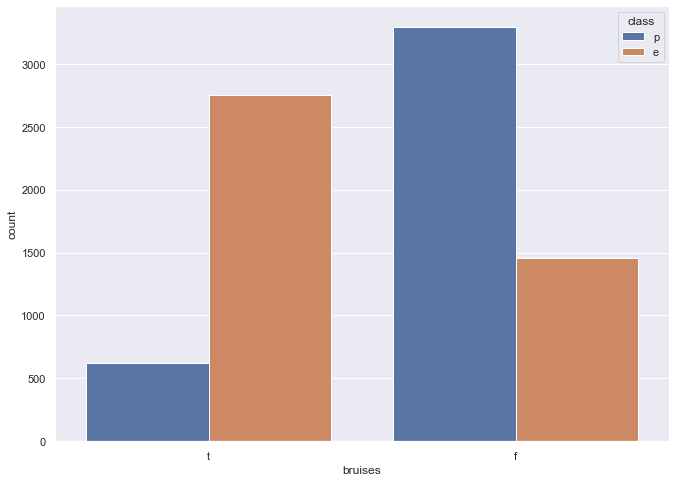

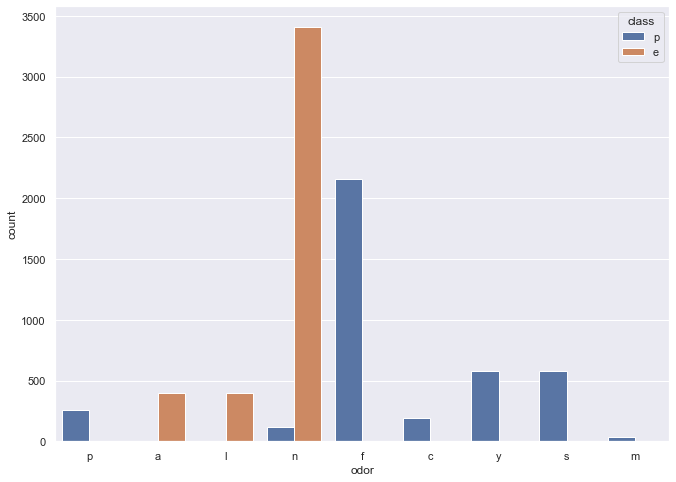

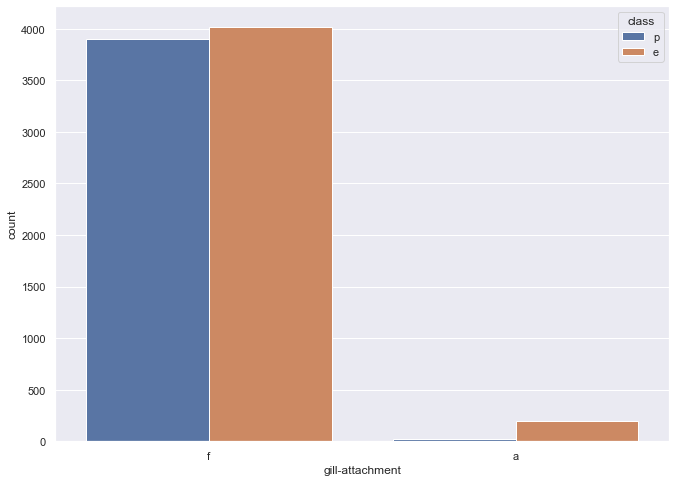

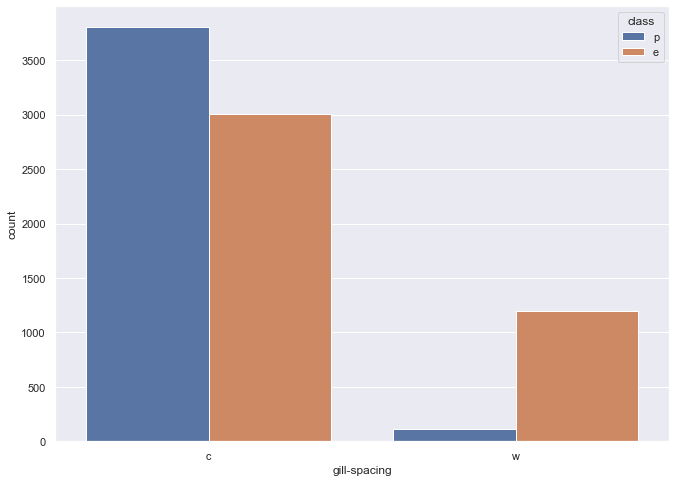

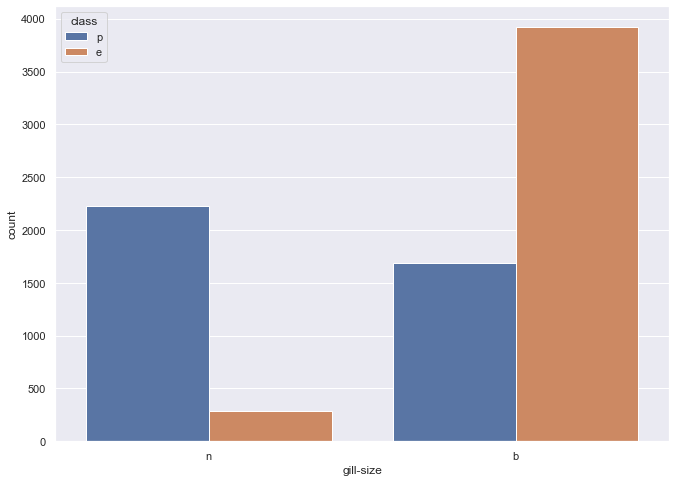

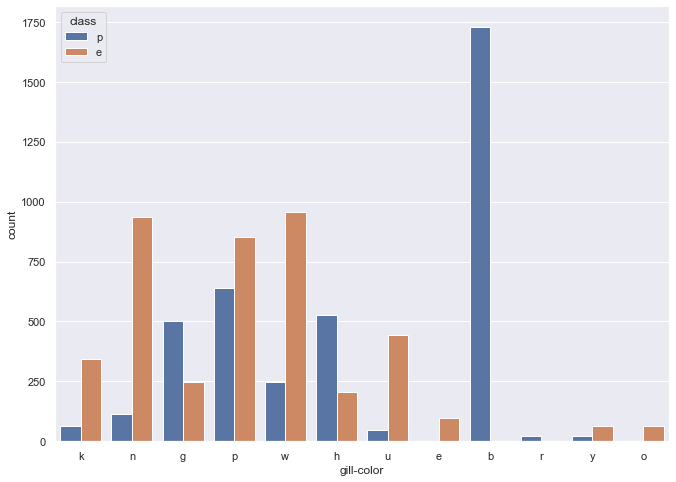

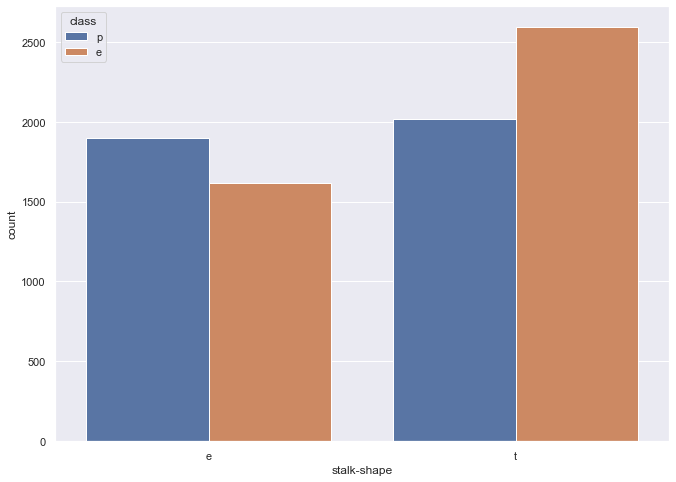

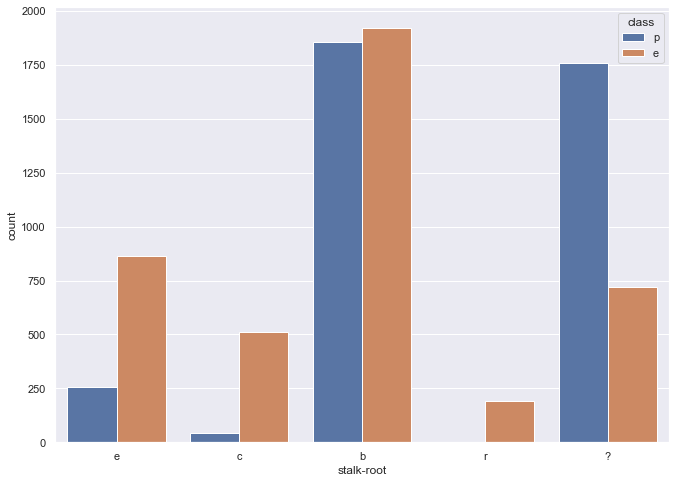

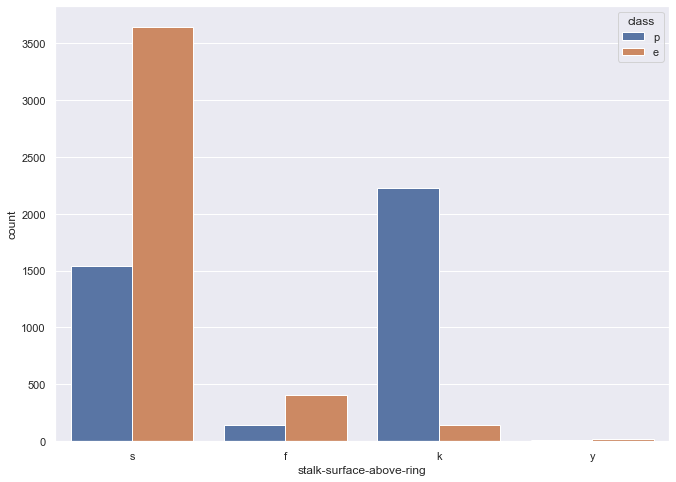

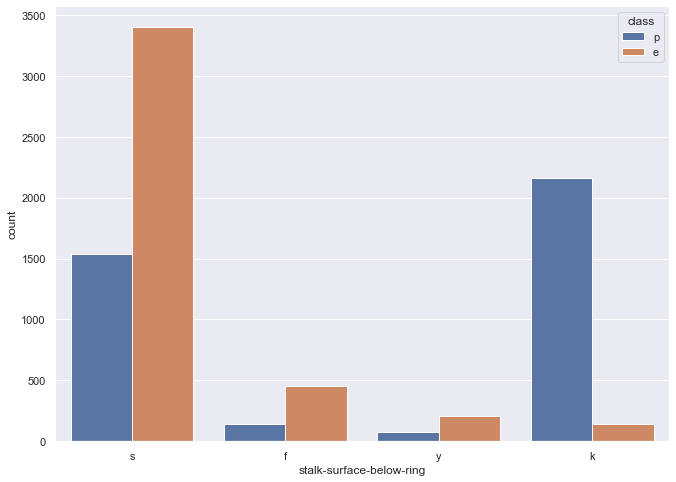

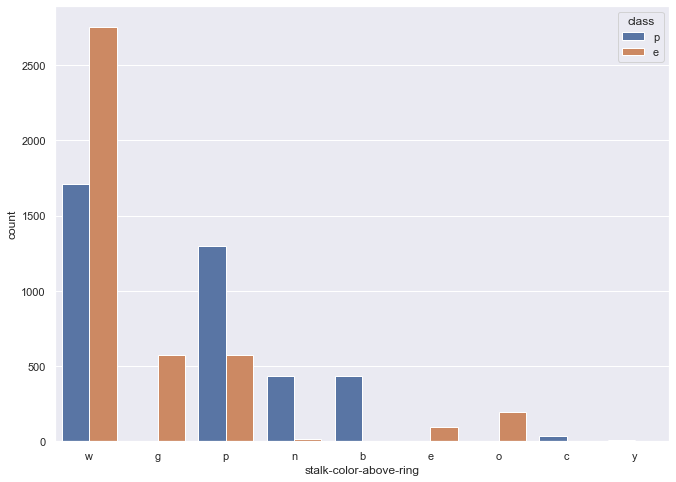

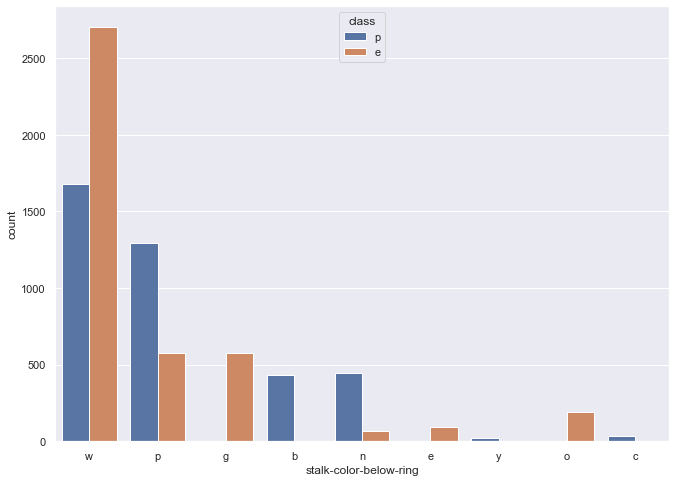

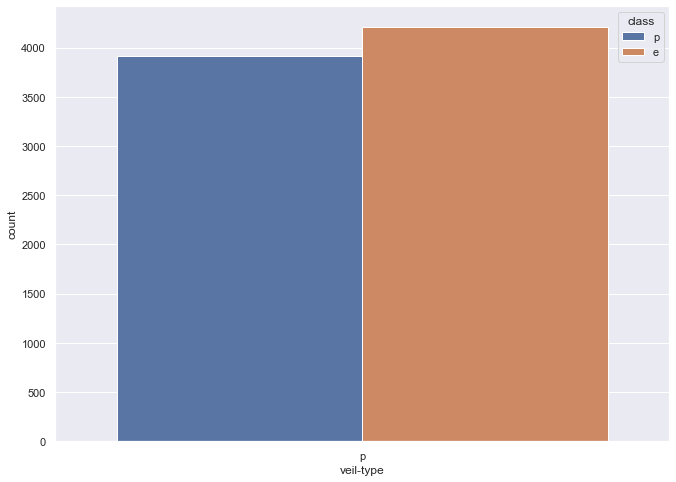

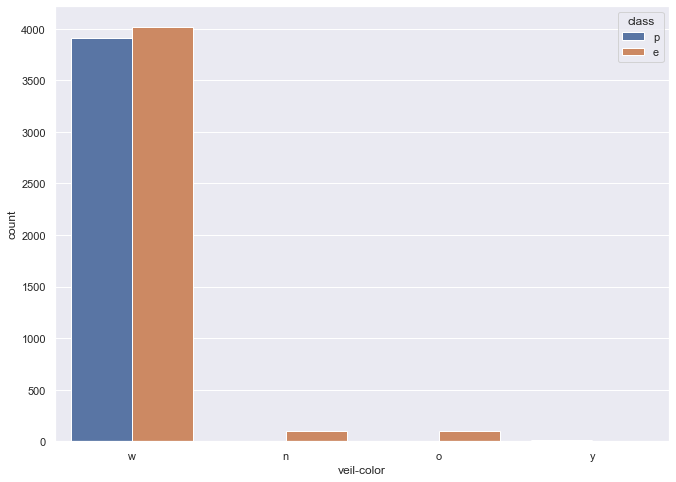

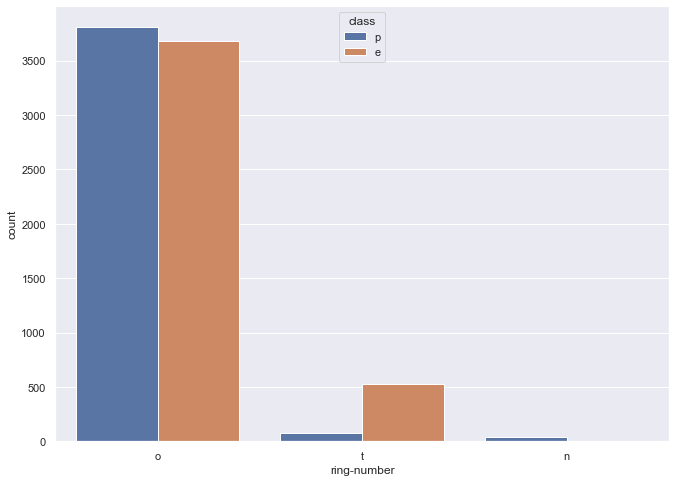

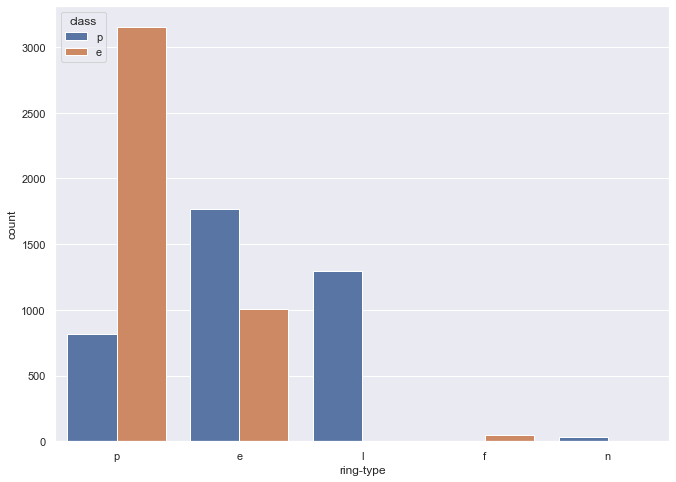

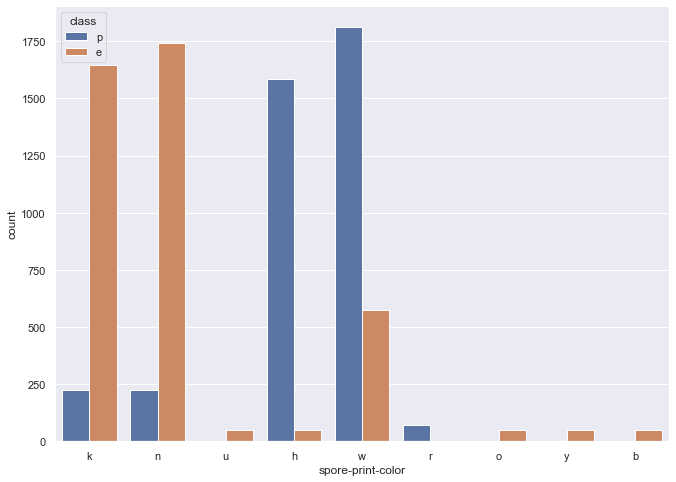

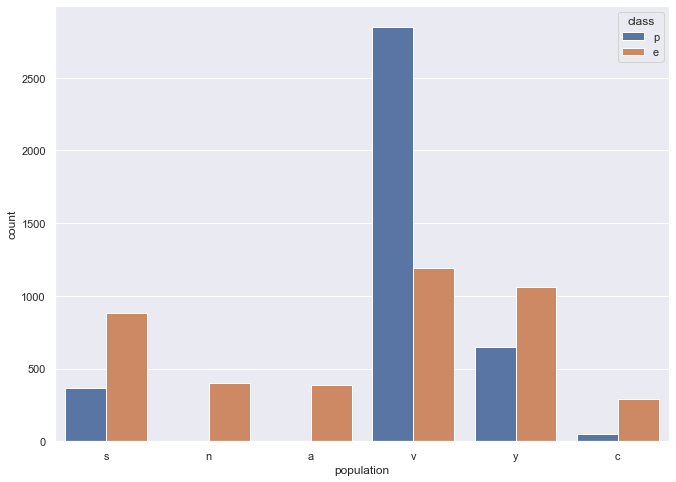

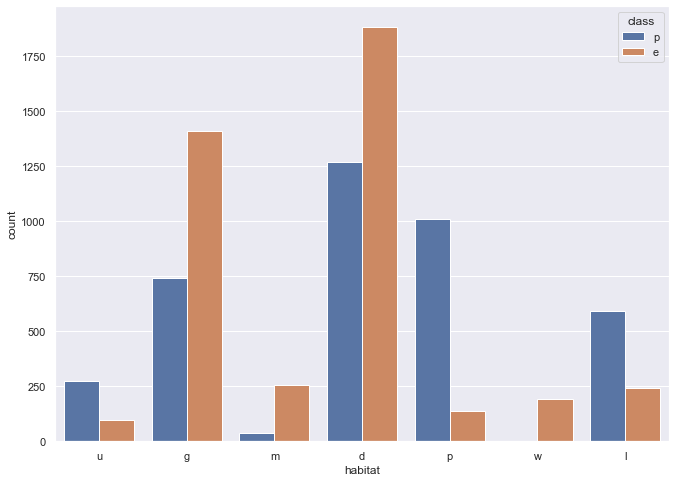

In [9]:
hue = data['class']
data_for_plot = data.drop('class',1)

data_plot(hue, data_for_plot)

In [10]:
#Checking for missing values

for col in data.columns:
    print("{} : {}".format(col,data[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


In [11]:
#Let's get ready for medelling with a label encoder

le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
#get_dummies to the rest of the features

encoded_data = pd.get_dummies(data)

encoded_data.head(5)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [15]:
#Breaking our dataset into training & test

from sklearn.model_selection import train_test_split

y = data['class'].values.reshape(-1,1)
X = encoded_data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [16]:
#Let's first look at how logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [17]:
lg = LogisticRegression()

lg.fit(X_train, y_train.ravel())

LogisticRegression()

In [20]:
#confusion matrix
y_prob = lg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>0.5,1,0)
cm = metrics.confusion_matrix(y_test,y_pred)

cm

array([[843,   0],
       [  0, 782]], dtype=int64)

In [21]:
#ROC Curve

auc_roc = metrics.roc_auc_score(y_test,y_pred)

auc_roc

1.0

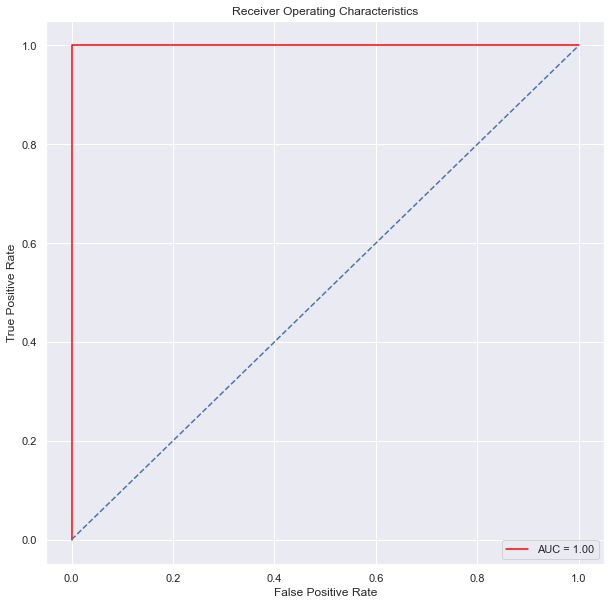

In [22]:
#making our own function to visualize ROC curve

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

def plot_roc(roc_auc):
    plt.figure(figsize=(10,10))
    plt.title("Receiver Operating Characteristics")
    plt.plot(false_positive_rate,true_positive_rate, color='red',label= 'AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

plot_roc(roc_auc)